### Discretize continuous variables

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# function to discretize continuous variables
def discretize(df, variables_model, threshold,n_bins):
    for variable in variables_model:
        if check_discretize(df, variable, threshold):
            new_variable = "disc_" + variable
            df[new_variable] = pd.qcut(df[variable], n_bins)
def check_discretize(df,variable, threshold):    
    return(len(df.groupby(variable))>threshold)

In [68]:
data = pd.read_csv('/Users/xingkaiwu/OneDrive - York University/MBAN Winter/MBAN 6400/Datacamp Predictive Analytics in Python/basetable_ex2_4.csv')
basetable = data[['target', 'gender_F', 'income_high', 'income_low', 'country_USA',
       'country_India', 'country_UK', 'age', 'time_since_last_gift',
       'time_since_first_gift', 'max_gift', 'min_gift', 'mean_gift',
       'number_gift']]
variables = list(basetable.columns)
variables.remove("target")

In [69]:
discretize(basetable,variables,5,5)

In [70]:
# Discretize the variable 
basetable["disc_number_gift"] = pd.cut(basetable['number_gift'],[0, 5, 10, 20])

# Count the number of observations per group
print(basetable.groupby("disc_number_gift").size())

disc_number_gift
(0, 5]      13808
(5, 10]     10220
(10, 20]      972
dtype: int64


### predictor insight graph table

In [71]:
def create_pig_table(df, target, variable):
    # Group by the variable you want to plot
    groups = df[[target,variable]].groupby(variable)
    # Calculate the size and incidence of each group
    pig_table = groups[target].agg(Incidence='mean', Size='size').reset_index()
    return pig_table

In [72]:
print(create_pig_table(basetable,'target','gender_F'))

   gender_F  Incidence   Size
0         0   0.044924  12421
1         1   0.050004  12579


In [73]:
# Create the list of variables for our predictor insight graph tables
variables = ["gender_F","disc_mean_gift","disc_time_since_last_gift"]

# Create an empty dictionary
pig_tables = {}

# Loop through the variables
for variable in variables:
  
    # Create a predictor insight graph table
    pig_table = create_pig_table(basetable,'target', variable)
    
    # Add the table to the dictionary
    pig_tables[variable] = pig_table

# Print the predictor insight graph table of the variable "disc_time_since_last_gift"
print(pig_tables["disc_time_since_last_gift"])

  disc_time_since_last_gift  Incidence  Size
0           (31.999, 459.0]   0.071786  5001
1            (459.0, 656.0]   0.061657  5044
2            (656.0, 832.0]   0.049980  4962
3           (832.0, 1047.0]   0.033360  5006
4          (1047.0, 2305.0]   0.020453  4987


In [74]:
pig_tables

{'gender_F':    gender_F  Incidence   Size
 0         0   0.044924  12421
 1         1   0.050004  12579,
 'disc_mean_gift':    disc_mean_gift  Incidence  Size
 0  (17.999, 78.0]   0.013596  5075
 1  (78.0, 86.857]   0.028827  4926
 2  (86.857, 94.2]   0.037894  5014
 3   (94.2, 103.0]   0.059740  5072
 4  (103.0, 194.0]   0.098311  4913,
 'disc_time_since_last_gift':   disc_time_since_last_gift  Incidence  Size
 0           (31.999, 459.0]   0.071786  5001
 1            (459.0, 656.0]   0.061657  5044
 2            (656.0, 832.0]   0.049980  4962
 3           (832.0, 1047.0]   0.033360  5006
 4          (1047.0, 2305.0]   0.020453  4987}

### Plotting the predictor insight graph

In [75]:
# The function to plot a predictor insight graph.
def plot_incidence(pig_table, variable):
    
    # Plot the incidence line
    pig_table = pig_table[variable]
    pig_table["Incidence"].plot()
    
    # Formatting the predictor insight graph
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylim([0, max(pig_table["Incidence"]*2)])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="right")
    plt.xlabel(variable)
    
    # Show the graph
    plt.show()


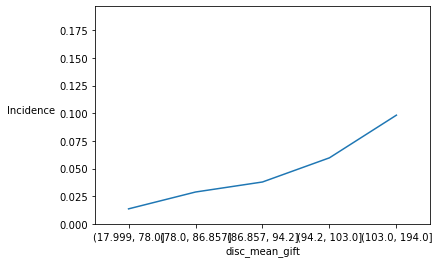

In [76]:
# Apply the function for the variable "disc_mean_gift".
plot_incidence(pig_tables, "disc_mean_gift")

In [77]:
# The function to plot a predictor insight graph
def plot_pig(pig_table, variable):
    
    # Plot formatting
    plt.ylabel("Size", rotation=0, rotation_mode="anchor", ha="right")
    
    # Plot the bars with sizes 
    pig_table = pig_table[variable]
    pig_table["Size"].plot(kind="bar", width=0.5, color="lightgray", edgecolor="none") 
    
    # Plot the incidence line on secondary axis
    pig_table["Incidence"].plot(secondary_y=True)
    
    # Plot formatting
    plt.xticks(np.arange(len(pig_table)), pig_table[variable])
    plt.xlim([-0.5, len(pig_table) - 0.5])
    plt.ylabel("Incidence", rotation=0, rotation_mode="anchor", ha="left")
    
    # Show the graph
    plt.show()


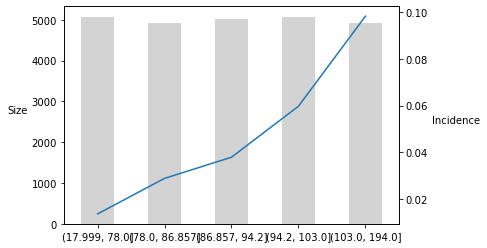

In [78]:
# Apply the function for the variable "disc_mean_gift"
plot_pig(pig_tables, "disc_mean_gift")

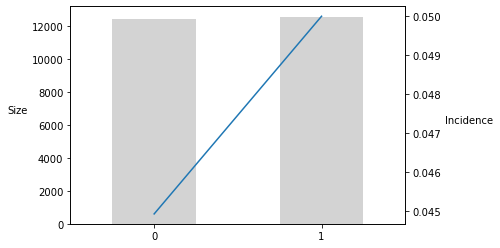

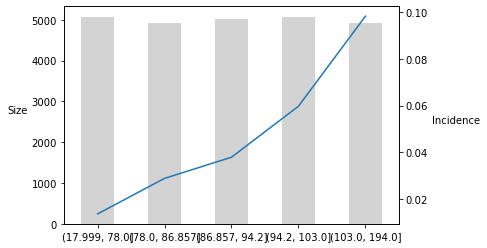

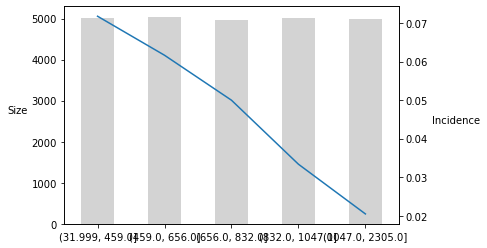

In [79]:
# Variables you want to make predictor insight graph tables for
variables = ["gender_F","disc_mean_gift","disc_time_since_last_gift"]

# Loop through the variables
for variable in variables: 
    
    # Create the predictor insight graph table
    pig_table = create_pig_table(basetable, "target", variable)
    
    # Plot the predictor insight graph
    plot_pig(pig_tables, variable)